In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../Денис/dataset/twitchdata-update.csv')

In [180]:
print(df.shape)
df.head()

(1000, 11)


,channel,time_watch,time_stream,viewers_peak,avg_viewers,followers,follower_gained,views_gained,partner,mature,language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [3]:
df.rename({'Channel':'channel','Watch time(Minutes)':'time_watch','Stream time(minutes)':'time_stream'\
          ,'Peak viewers':'viewers_peak','Average viewers':'avg_viewers','Followers':'followers'\
          ,'Followers gained':'follower_gained'\
          ,'Partnered':'partner','Mature':'mature','Language':'language','Views gained':'views_gained'},axis=1,inplace=True)

In [11]:
col=['avg_viewers','viewers_peak','follower_gained','views_gained']

<AxesSubplot:xlabel='language', ylabel='count'>

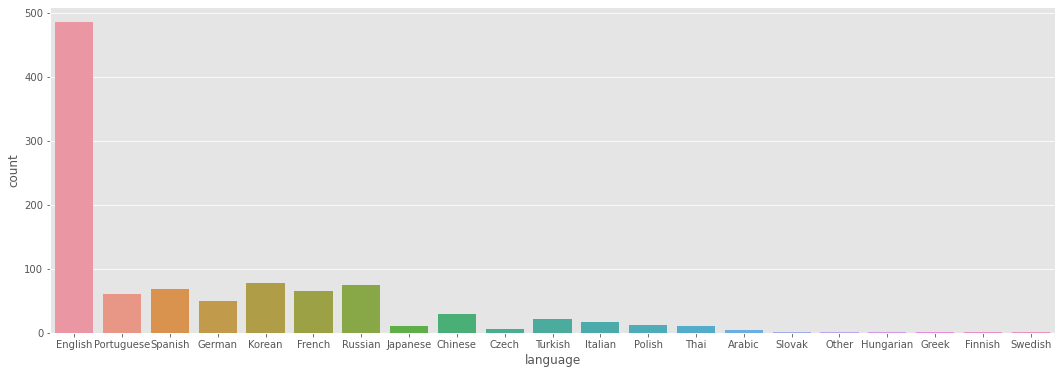

In [84]:
plt.figure(figsize=(18,6))
sns.countplot(x='language',data=df)

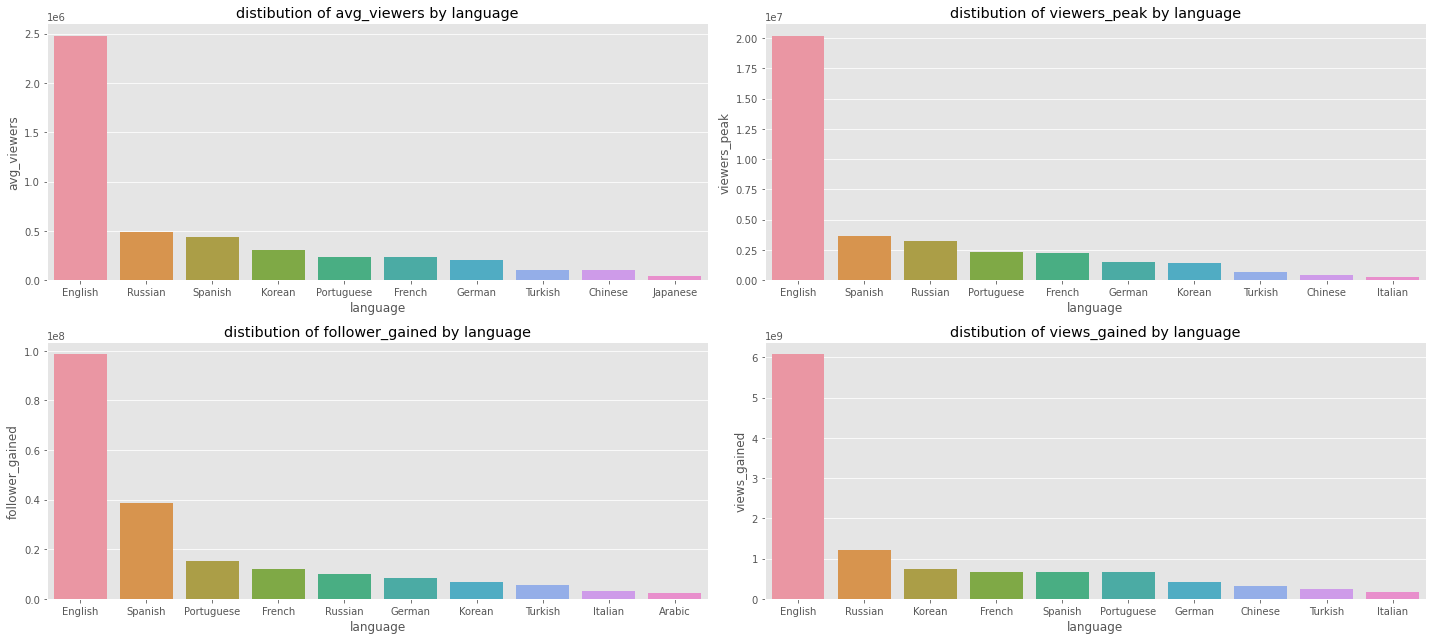

In [170]:
f=plt.figure(figsize=(20,9))
for i,cols in enumerate(col):
    ax=f.add_subplot(2,2,i+1)
    ww=df.groupby('language')[cols].sum().sort_values(ascending=False)[:10]
    ww_df=pd.DataFrame(ww.reset_index())
    sns.barplot(x='language',y=cols,data=ww_df,ax=ax)
    plt.title('distibution of '+cols+' by language')
f.tight_layout();

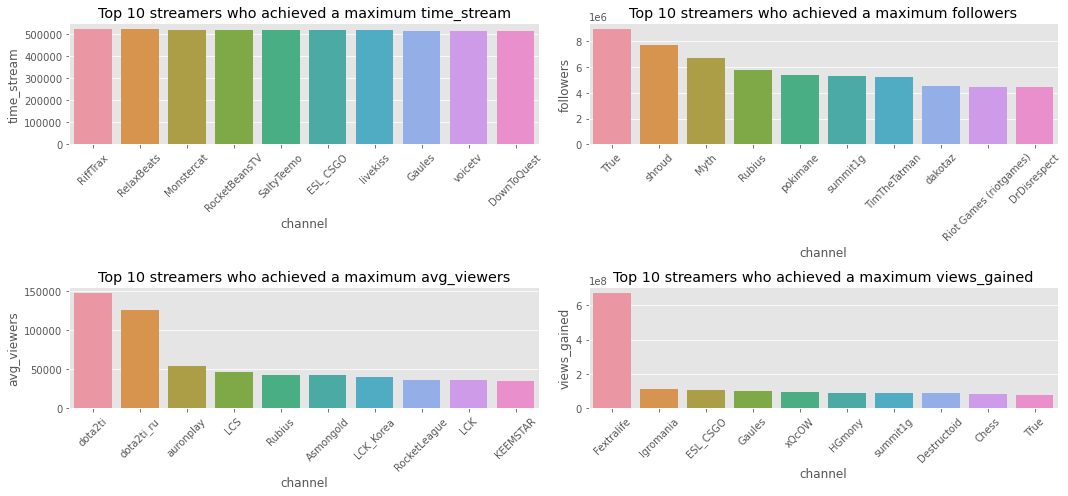

In [108]:
f=plt.figure(figsize=(15,7))
for i,cols in enumerate(['time_stream','followers','avg_viewers','views_gained']):
    f.add_subplot(2,2,i+1)
    sns.barplot(x='channel',y=cols,data=df[[cols,'channel']]\
               .sort_values(cols,ascending=False)[:10])
    plt.title('Top 10 streamers who achieved a maximum ' + cols)
    plt.xticks(rotation=45)
f.tight_layout();

C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: 

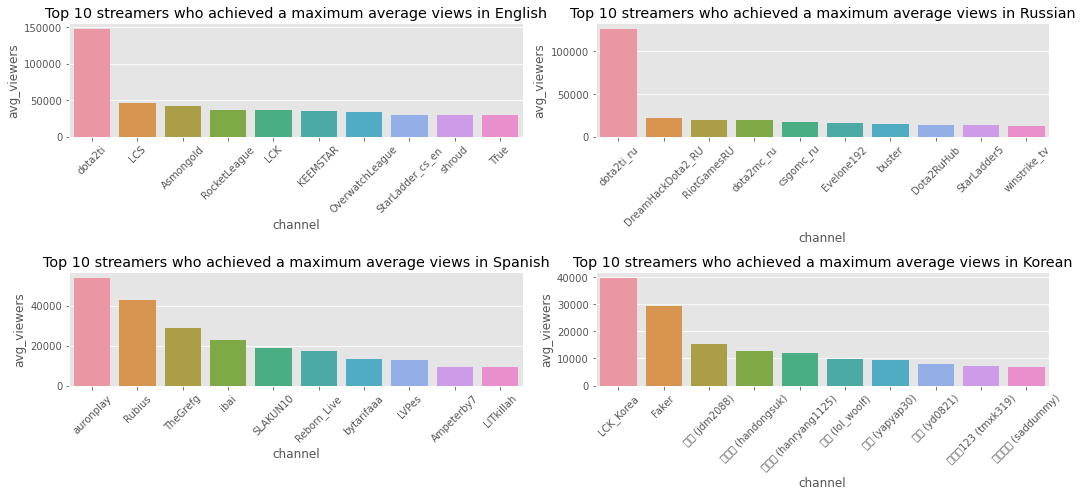

In [114]:
f=plt.figure(figsize=(15,7))
for i,cols in enumerate(['English','Russian','Spanish','Korean']):
    f.add_subplot(2,2,i+1)
    sns.barplot(x='channel',y='avg_viewers',data=df[df['language']==cols]\
               .sort_values('avg_viewers',ascending=False)[:10])
    plt.title('Top 10 streamers who achieved a maximum average views in '+cols)
    plt.xticks(rotation=45)
f.tight_layout();

770
230


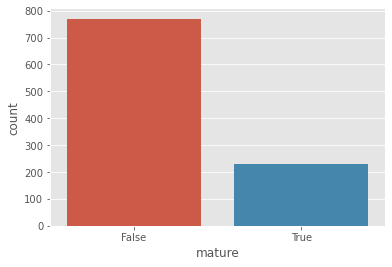

In [125]:
print(df[df['mature']==False]['channel'].count())
print(df[df['mature']==True]['channel'].count())
sns.countplot(x='mature',data=df);

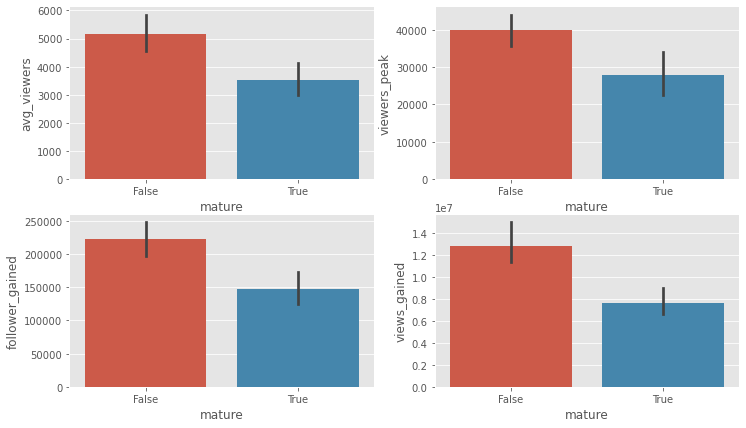

In [72]:
f=plt.figure(figsize=(12,7))
for i, cols in enumerate(col):
    ax=f.add_subplot(2,2,i+1)
    sns.barplot(x='mature',y=cols,data=df)

In [124]:
def compare_by_mature(cols,slicee):
    f=plt.figure(figsize=(18,7))
    f.add_subplot(1,2,1)
    sns.barplot(x='channel',y=cols,data=df[df[slicee]==True][['channel',cols]]\
        .sort_values(by=cols,ascending=False)[:20])
    plt.xticks(rotation=45)
    plt.title(slicee+' channels')
    f.add_subplot(1,2,2)
    sns.barplot(x='channel',y=cols,data=df[df[slicee]==False][['channel',cols]]\
        .sort_values(by=cols,ascending=False)[:20])
    plt.xticks(rotation=45)
    plt.title('Non '+ slicee+' channels')
    plt.tight_layout();

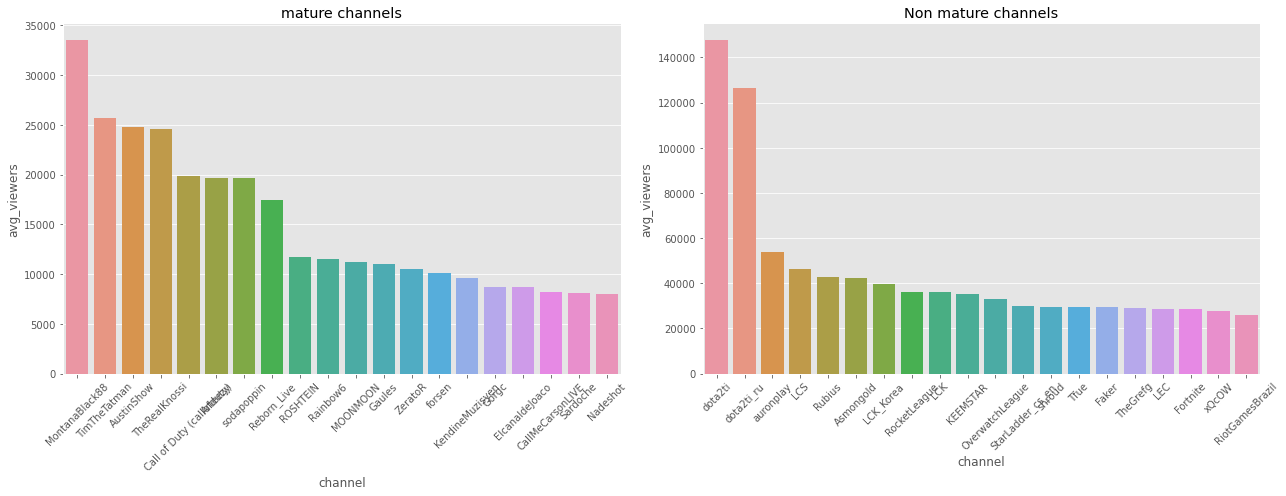

In [125]:
compare_by_mature('avg_viewers','mature')

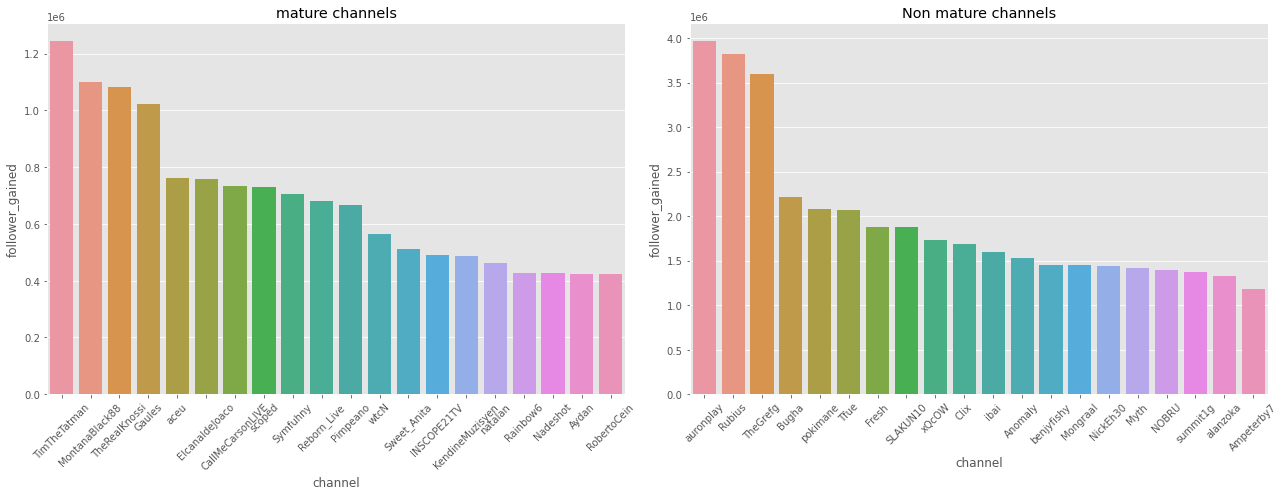

In [126]:
compare_by_mature('follower_gained','mature')

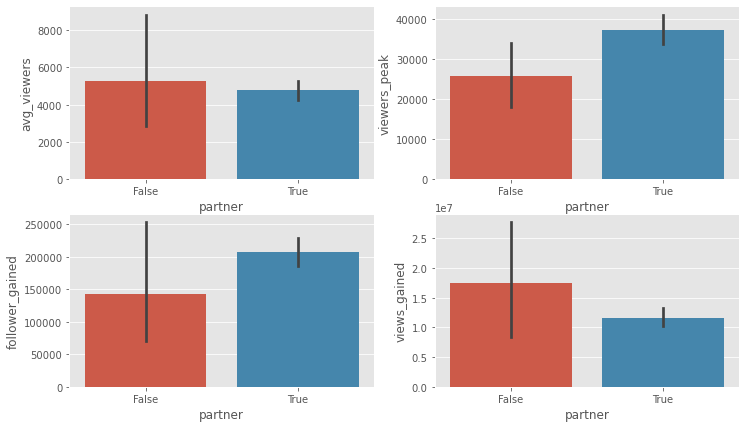

In [69]:
f=plt.figure(figsize=(12,7))
for i, cols in enumerate(col):
    ax=f.add_subplot(2,2,i+1)
    sns.barplot(x='partner',y=cols,data=df)

C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45320 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Public\Videos\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: Runt

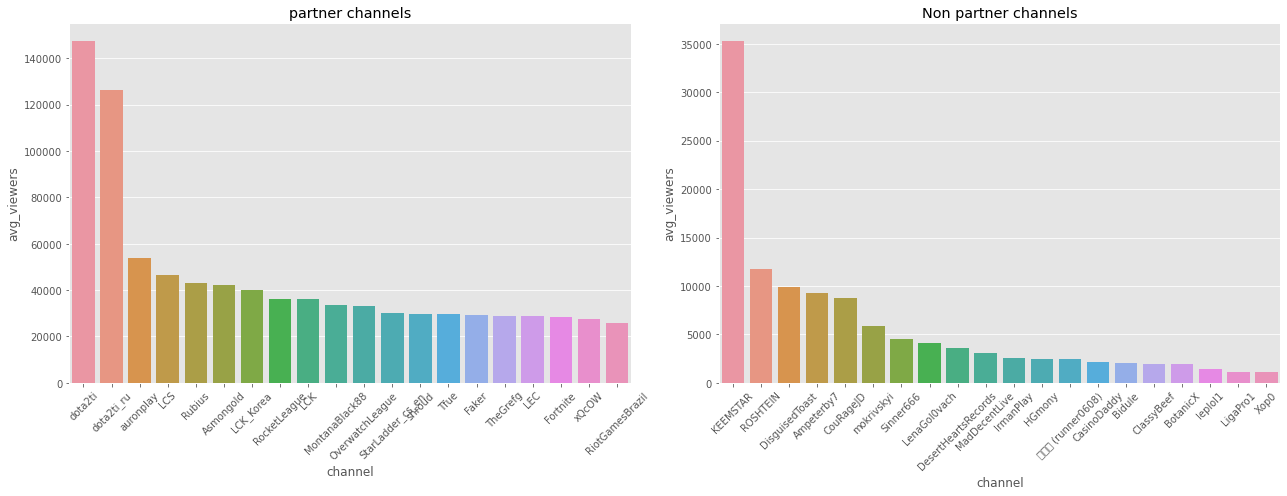

In [127]:
compare_by_mature('avg_viewers','partner')

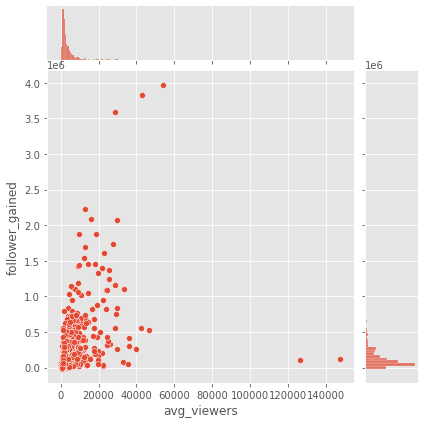

In [174]:
sns.jointplot(x='avg_viewers',y='follower_gained',data=df)